Calculate the correlation between the pairwise distance of cells on PCA and UMAP embedding

In [57]:
import random
import json

# set variables
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
random_seeds = [random.randint(0, 2**32 - 1) for i in range(100)]
config_path = "configs/config.json"
path_cluster = "outputs/cellranger/reanalyze/tung_batch1_rs17/outs/analysis/clustering/gene_expression_kmeans_10_clusters/clusters.csv"
path_dmat_pca = "outputs/distance_matrix/pca/{sample}.csv"
path_dmat_umap = "outputs/distance_matrix/umap/{sample}_rs{random_seed}.csv"



sampled_rs = set(random.choices(random_seeds, k=10))
sampled_barcode = set(random.choices(list(dmat_pca.index), k=10))

# read config
config = json.load(open(config_path, "r"))
samples = [i["name"] for i in config["samples"]]

Load distance matrices

In [11]:
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

# use distances in PCA as standard
dmat_pca = pd.read_csv(path_dmat_pca.format(sample=samples[0]), index_col=0)

pearson_r_by_rs = {}
for rs in random_seeds:
    # load distances in UMAP embeddings
    dmat_umap_n = pd.read_csv(
        path_dmat_umap.format(
            sample=samples[0],
            random_seed=rs
        ),
        index_col=0
    )
    
    
    pearson_r_values = []
    for barcode in dmat_pca.index:
        pearson_r_values.append(
            stats.pearsonr(dmat_pca.loc[barcode], dmat_umap_n.loc[barcode]).statistic
        )
        if (barcode in sampled_barcode) and (rs in sampled_rs):
            fig, ax = plt.subplots()
            ax.scatter(
                dmat_pca.loc[barcode],
                dmat_umap_n.loc[barcode]
            )
            ax.set_xlabel("PCA distance")
            ax.set_ylabel("UMAP distance")
            ax.set_title(f"Random seed {rs}; Barcode {barcode}\nPearson R = {pearson_r_values[-1]:.2f}")
            fig.savefig(f"outputs/notebook/distances/{barcode}_{rs}.png")
            plt.close()
    
    pearson_r_by_rs[rs] = pearson_r_values
pearson_r_by_rs = pd.DataFrame(pearson_r_by_rs)
pearson_r_by_rs.index = dmat_pca.index
pearson_r_by_rs.to_csv("outputs/notebook/pearson_r_by_rs.csv")

In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
pearson_r_by_rs = pd.read_csv("outputs/notebook/pearson_r_by_rs.csv", index_col=0)
pearson_r_by_rs.head()

,2746317213,1181241943,958682846,3163119785,1812140441,127978094,939042955,2340505846,946785248,2530876844,...,422701550,3700855390,1067970820,1926780541,1811967841,1196342297,3965395580,2363629219,3590711152,4161807235
Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCACCGCT-1,0.606040,0.563534,0.509334,0.550563,0.579980,0.591859,0.650769,0.575109,0.675966,0.670748,...,0.578417,0.578739,0.589215,0.597017,0.648833,0.594978,0.607326,0.514669,0.664285,0.603263
AAACCTGCAAGAGTCG-1,0.454395,0.766901,0.816639,0.771001,0.524634,0.742814,0.433947,0.429651,0.425042,0.427256,...,0.728268,0.427603,0.704311,0.485527,0.399701,0.453169,0.451424,0.828227,0.412180,0.438920
AAACCTGCACATTCGA-1,0.713356,0.825856,0.807878,0.812005,0.718679,0.801565,0.718458,0.693211,0.731816,0.728486,...,0.802572,0.732674,0.803201,0.735739,0.737148,0.723629,0.737573,0.811356,0.719481,0.730703
AAACCTGGTAAATGAC-1,0.696302,0.780421,0.772824,0.767094,0.698150,0.753817,0.663023,0.677377,0.678229,0.700993,...,0.768756,0.694707,0.769493,0.689490,0.694294,0.679758,0.705480,0.777549,0.664351,0.686121
AAACCTGGTCATCGGC-1,0.595378,0.699285,0.741625,0.721815,0.576381,0.757110,0.652187,0.585867,0.658853,0.686012,...,0.597107,0.598354,0.578264,0.595524,0.676327,0.591891,0.624432,0.750659,0.664947,0.588903


Heatmap representation of distance matrix

In [26]:
# load distances in PCA
dmat_pca = pd.read_csv(path_dmat_pca.format(sample=samples[0]), index_col=0)

# sort barcode by cluster
cluster = cluster.sort_values("Cluster")
cluster

Plot PCA distance matrix

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20))
sns.heatmap(
    data=dmat_pca.loc[cluster.index, cluster.index],
    xticklabels=False,
    yticklabels=False,
    cmap="viridis",
    cbar=True,
    ax=ax
)
fig.savefig("outputs/notebook/dmat_pca.png")
plt.close()

Plot UMAP distance matrix

In [68]:
# plot UMAP distance matrix
for sample in samples:
    for rs in sampled_rs:
        # load distances
        dmat_umap_n = pd.read_csv(
            path_dmat_umap.format(
                sample=sample,
                random_seed=rs
            ),
            index_col=0
        )

        # create figure        
        fig, ax = plt.subplots(1, 1, figsize=(25, 20))
        sns.heatmap(
            data=dmat_umap_n.loc[cluster.index, cluster.index],
            xticklabels=False,
            yticklabels=False,
            cmap="viridis",
            cbar=True,
            ax=ax
        )
        fig.savefig("outputs/notebook/dmat_umap_{rs}.png".format(rs=rs))
        plt.close()

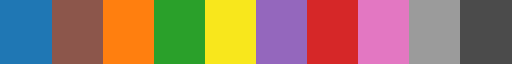

In [78]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the list of colors
colors = [
    "#1F77B4",  # blue
    "#8C564B",  # brown
    "#FF7F0F",  # orange
    "#2AA02A",  # green
    "#F8E71C",  # yellow
    "#9467BD",  # purple
    "#D62728",  # red
    "#E377C2",  # pink
    "#9B9B9B",  # light grey
    "#4B4B4B"   # dark grey
]

# Create a colormap
cmap = ListedColormap(colors)
cmap